In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [366]:
data = pd.read_csv(r'D:\Data Science\Evaluation projects\avocado.csv')
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [367]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


AS we can see date, type and region are float data type an others are int and float 

Now lets check for any null values

In [368]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

we dont have any null values so we are good to go,

also Unamed: 0 column is irrelvant so we will drop it from the dataset,

also we will extract additional columns from the date column for further insight

In [369]:
data = data.drop(columns='Unnamed: 0')

data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# EDA

In [370]:
data['Date'] = pd.DatetimeIndex(data['Date'])
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['day'] = pd.DatetimeIndex(data['Date']).day
data['Day-Month'] = data['Month'].astype(str).str.zfill(2) + '-' + data['day'].astype(str).str.zfill(2)
data['Month-Year'] = data['year'].astype(str) + '-' + data['Month'].astype(str).str.zfill(2)



data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,day,Day-Month,Month-Year
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27,12-27,2015-12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20,12-20,2015-12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13,12-13,2015-12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6,12-06,2015-12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29,11-29,2015-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4,02-04,2018-02
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28,01-28,2018-01
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21,01-21,2018-01
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14,01-14,2018-01


In [371]:
# adding conditional column of Quater in the dataset
data.loc[data['Month'] <= 12, 'Quater'] = 'Q4'
data.loc[data['Month'] <= 9, 'Quater'] = 'Q3'
data.loc[data['Month'] <= 6, 'Quater'] = 'Q2'
data.loc[data['Month'] <= 3, 'Quater'] = 'Q1'

data['Quater'] = data['Quater'] + '-' + data['year'].astype(str)
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,day,Day-Month,Month-Year,Quater
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27,12-27,2015-12,Q4-2015
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20,12-20,2015-12,Q4-2015
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13,12-13,2015-12,Q4-2015
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6,12-06,2015-12,Q4-2015
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29,11-29,2015-11,Q4-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4,02-04,2018-02,Q1-2018
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28,01-28,2018-01,Q1-2018
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21,01-21,2018-01,Q1-2018
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14,01-14,2018-01,Q1-2018


<Figure size 1440x1080 with 0 Axes>

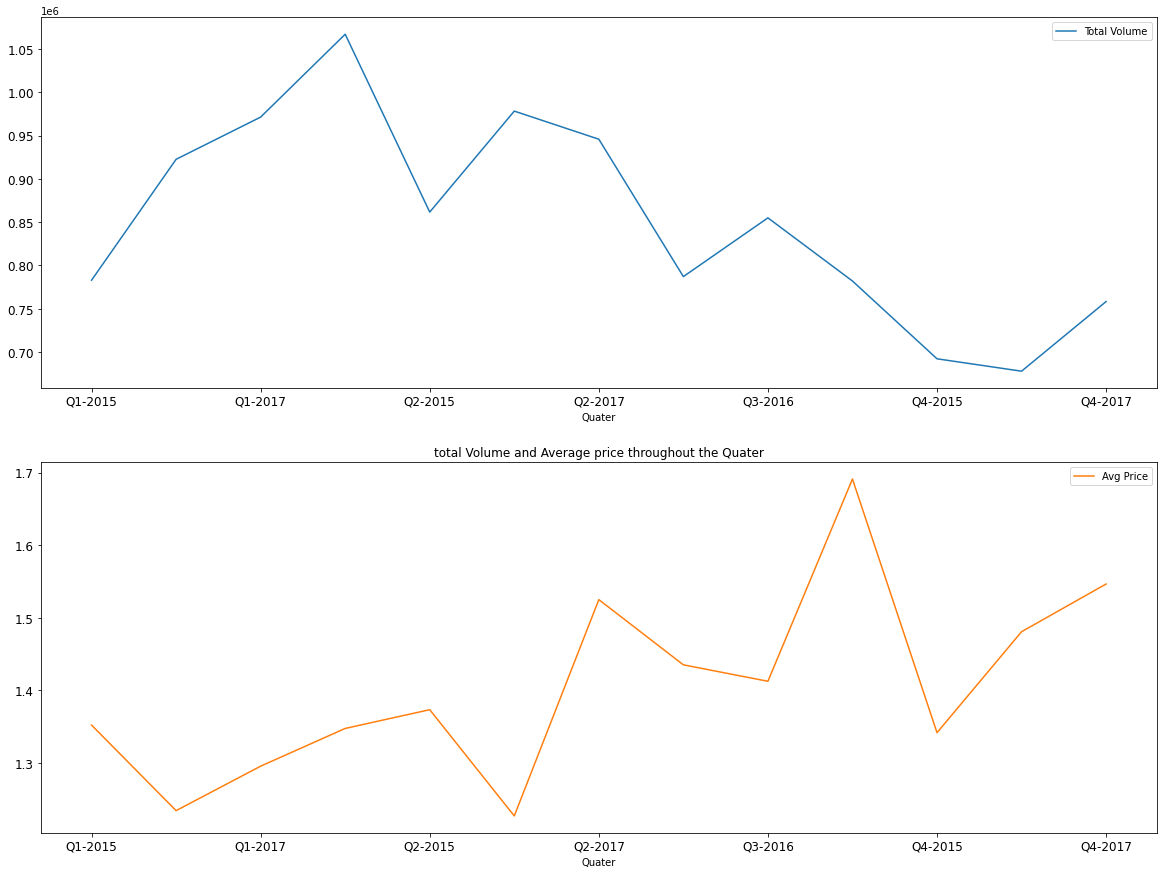

In [372]:
# comparing total value and average price over time
total_volume = data['Total Volume'].groupby(data['Quater']).mean()
average_price = data['AveragePrice'].groupby(data['Quater']).mean()

trend = pd.DataFrame({'Total Volume':total_volume,'Avg Price':average_price})
plt.figure(figsize=(20,15))
trend.plot(kind='line',figsize=(20,15),sharex=False,subplots=True,fontsize=12)
plt.title('total Volume and Average price throughout the Quater')
plt.show()

Based on above plot we can clearly see that average price of the avocado is gradually increasing (line graph 2), however due to increased price the demand or sales of avocado decreased accordingly,

so we can infer that the price of the avocado plays a major role on the sales of Avocado

<Figure size 1440x1080 with 0 Axes>

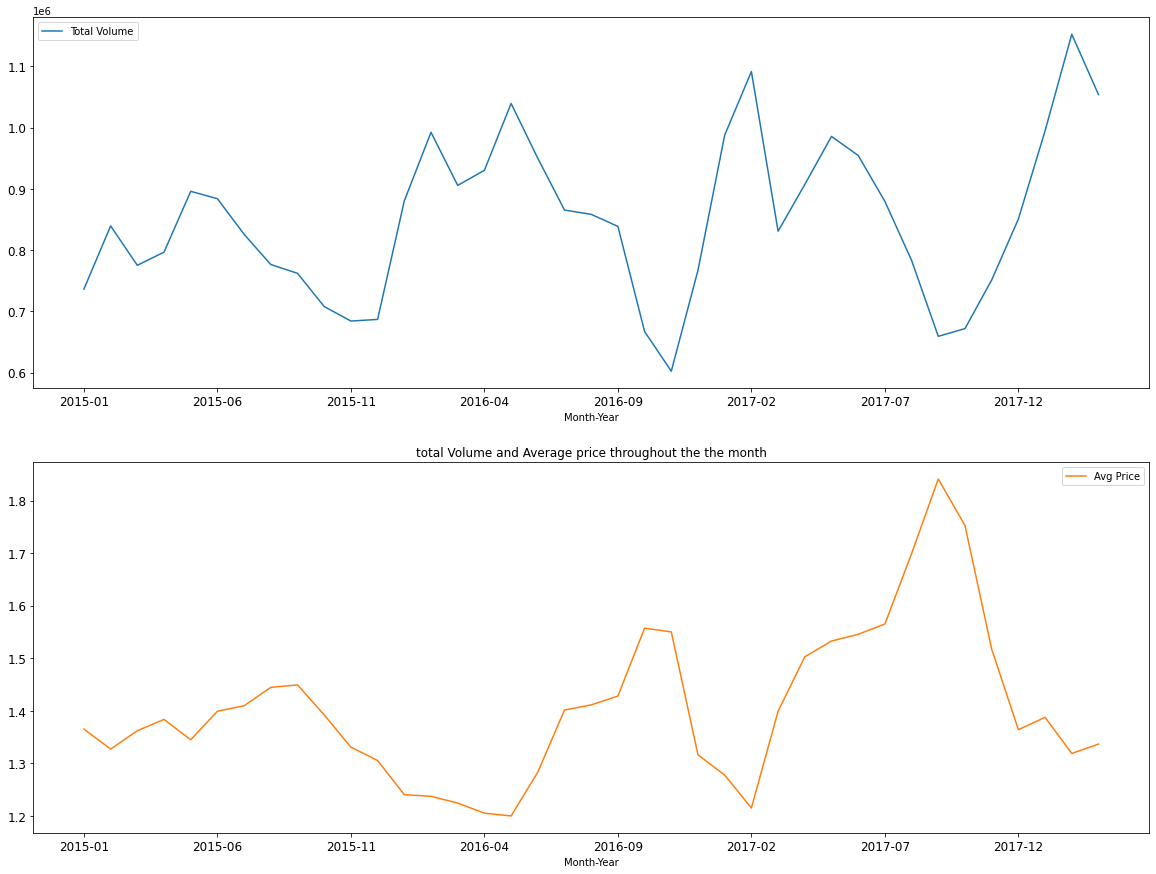

In [373]:
# Checking the trend of price and total volume  over the month 
total_volume = data['Total Volume'].groupby(data['Month-Year']).mean()
average_price = data['AveragePrice'].groupby(data['Month-Year']).mean()

trend = pd.DataFrame({'Total Volume':total_volume,'Avg Price':average_price})
plt.figure(figsize=(20,15))
trend.plot(kind='line',figsize=(20,15),sharex=False,subplots=True,fontsize=12)
plt.title('total Volume and Average price throughout the the month')
plt.show()

<Figure size 1440x1080 with 0 Axes>

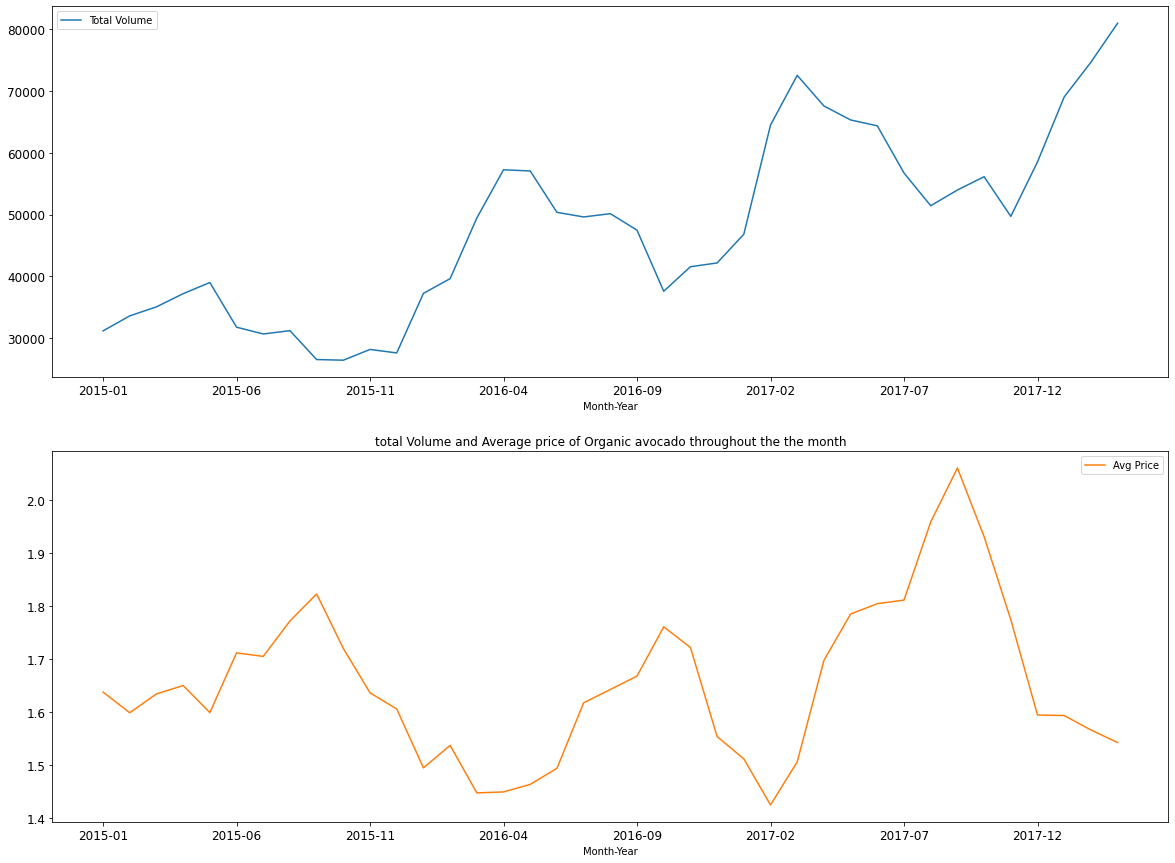

In [374]:

con = data[data.type == 'organic']
total_volume = con['Total Volume'].groupby(con['Month-Year']).mean()
average_price = con['AveragePrice'].groupby(con['Month-Year']).mean()

trend = pd.DataFrame({'Total Volume':total_volume,'Avg Price':average_price})
plt.figure(figsize=(20,15))
trend.plot(kind='line',figsize=(20,15),sharex=False,subplots=True,fontsize=12)
plt.title('total Volume and Average price of Organic avocado throughout the the month')
plt.show()

<Figure size 1440x1080 with 0 Axes>

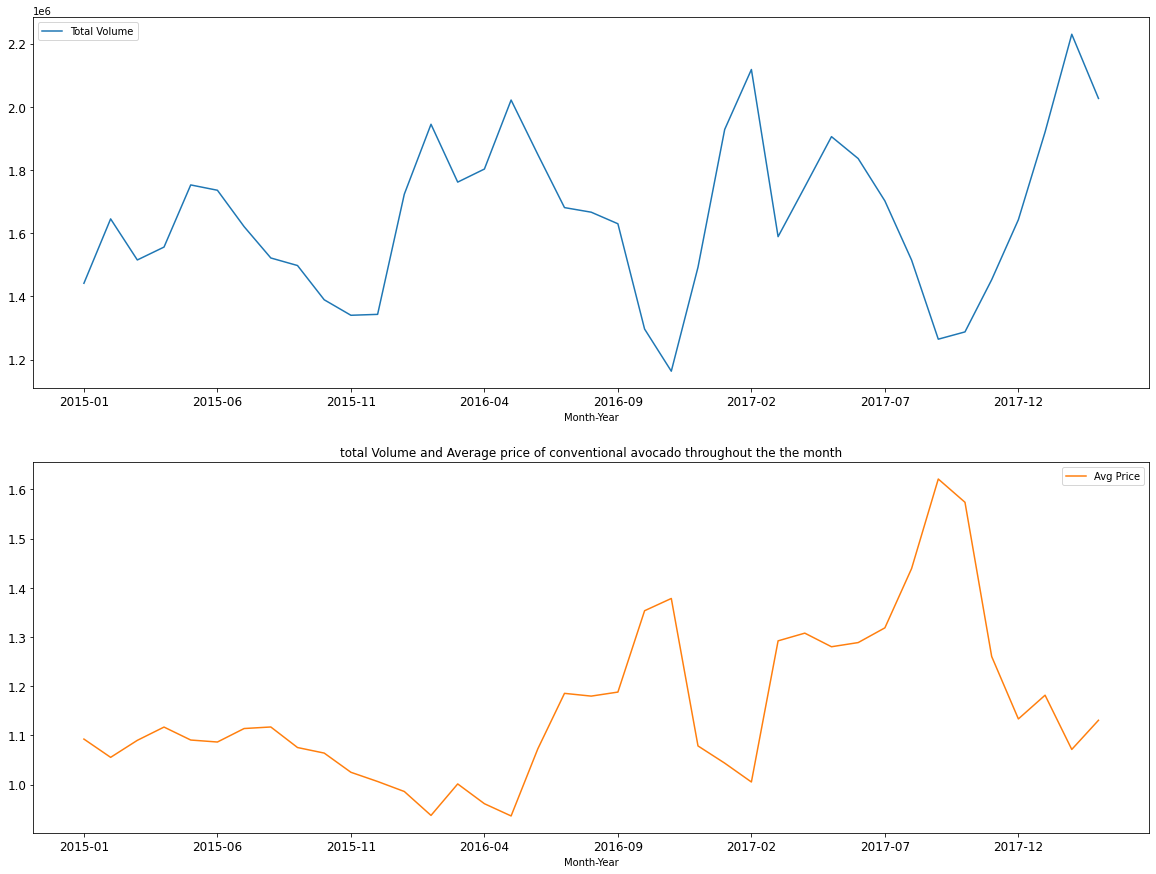

In [375]:
con = data[data.type == 'conventional']
total_volume = con['Total Volume'].groupby(con['Month-Year']).mean()
average_price = con['AveragePrice'].groupby(con['Month-Year']).mean()

trend = pd.DataFrame({'Total Volume':total_volume,'Avg Price':average_price})
plt.figure(figsize=(20,15))
trend.plot(kind='line',figsize=(20,15),sharex=False,subplots=True,fontsize=12)
plt.title('total Volume and Average price of conventional avocado throughout the the month')
plt.show()

Based on the above line charts we can say that

    the price of the avocado are lowest at the begining of the year i.e January and then it starts to climb up and reaches it peak in the mid year i.e. from june till august-september and then gradually it comes down as the year progresses
    
    on the contrary we have seen that the demands of avocado is lowest in june ( due to high prices) and and it starts to pick up when the prices goes down
    
    when we talk about Organic Avocado specifically, we can see that the demand of Organic avocaod are increasing gradually, however the trend of average price is similar as compared to that of conventional or overall average price
    
    we cant find any significant difference in the trend of conventional and overall avocado sales and prices, both the trend looks identical 

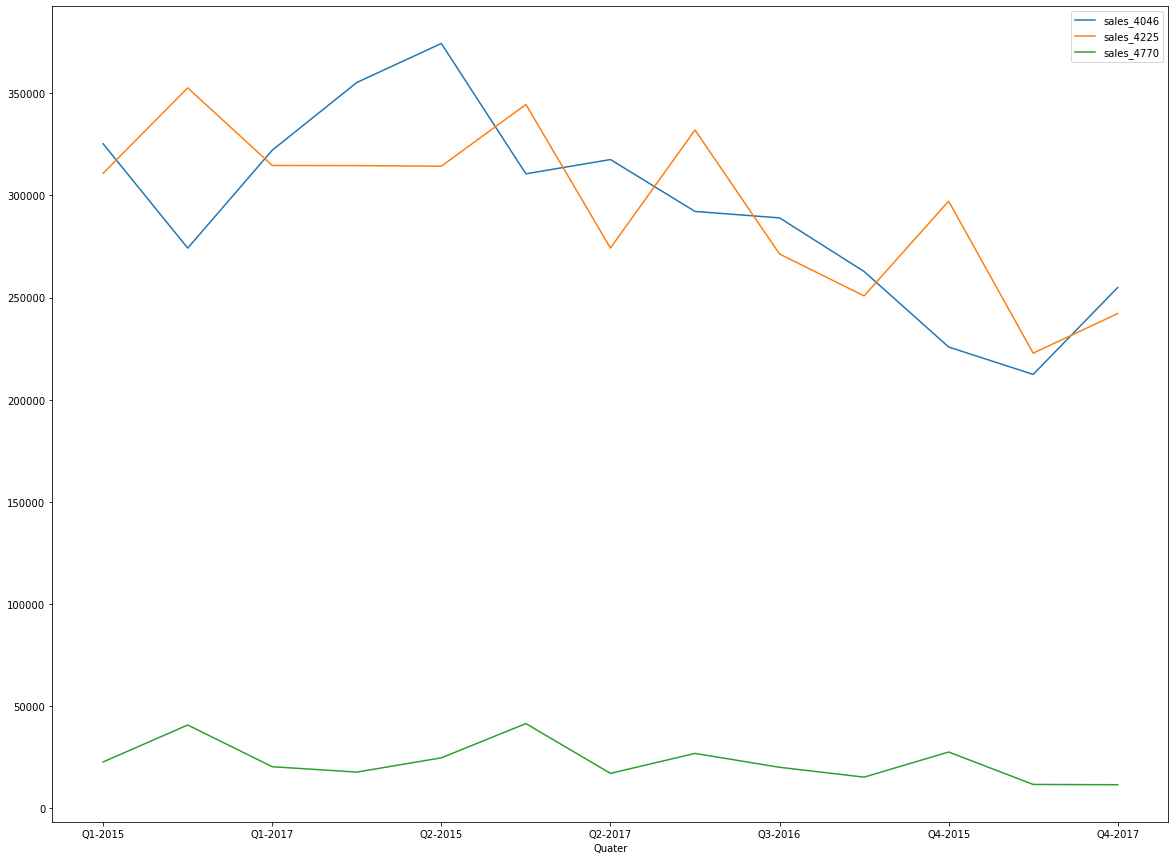

In [376]:
# comparing total sales of avocade with different SLU 
total_volume = data['Total Volume'].groupby(data['Quater']).mean()
sales_4046 = data['4046'].groupby(data['Quater']).mean()
sales_4225 = data['4225'].groupby(data['Quater']).mean()
sales_4770 = data['4770'].groupby(data['Quater']).mean()

trend = pd.DataFrame({'sales_4046':sales_4046,
                      'sales_4225':sales_4225,'sales_4770':sales_4770})
trend.plot(kind='line',figsize=(20,15))
plt.show()

Although we can clearly see that sales of all type of avocadoes are decreasing over time, still we can find an interesting trend between 4046 and 4225

when the sales of avocado 4046 decreases the sales of avocad 4225 increasing and vice a versa and this trend is visible across the dataset

In [377]:
total_volume = data['Total Volume'].groupby(data['region']).mean()
average_price = data['AveragePrice'].groupby(data['region']).mean()
percent = data['Total Volume'].groupby(data['region']).sum() / data['Total Volume'].sum()*100

trend = pd.DataFrame({'Total Volume':total_volume,'Avg Price':average_price,'Percent':percent})
trend = trend.sort_values(ascending=False,by='Percent')
trend.head(15)

,Total Volume,Avg Price,Percent
region,,,
TotalUS,1.735130e+07,1.319024,37.779992
West,3.215323e+06,1.272219,7.000908
California,3.044324e+06,1.395325,6.628583
SouthCentral,2.991952e+06,1.101243,6.514549
Northeast,2.110299e+06,1.601923,4.594875
Southeast,1.820232e+06,1.398018,3.963296
GreatLakes,1.744505e+06,1.338550,3.798410
Midsouth,1.503992e+06,1.404763,3.274729
LosAngeles,1.502653e+06,1.216006,3.271812


the above table shows the top contributor region in terms of Sales along with its average price:
    
    --- top region is TotalUS with 37.8 percent of the total sales, followed by West and california with 7 and 6 percent respectivley
    --- top 15 region contributes to more than 85% of the total sales

In [378]:
data['AveragePrice'].groupby(data['type']).mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

from the above table we can see that organic avocados are expensive than convential avocados

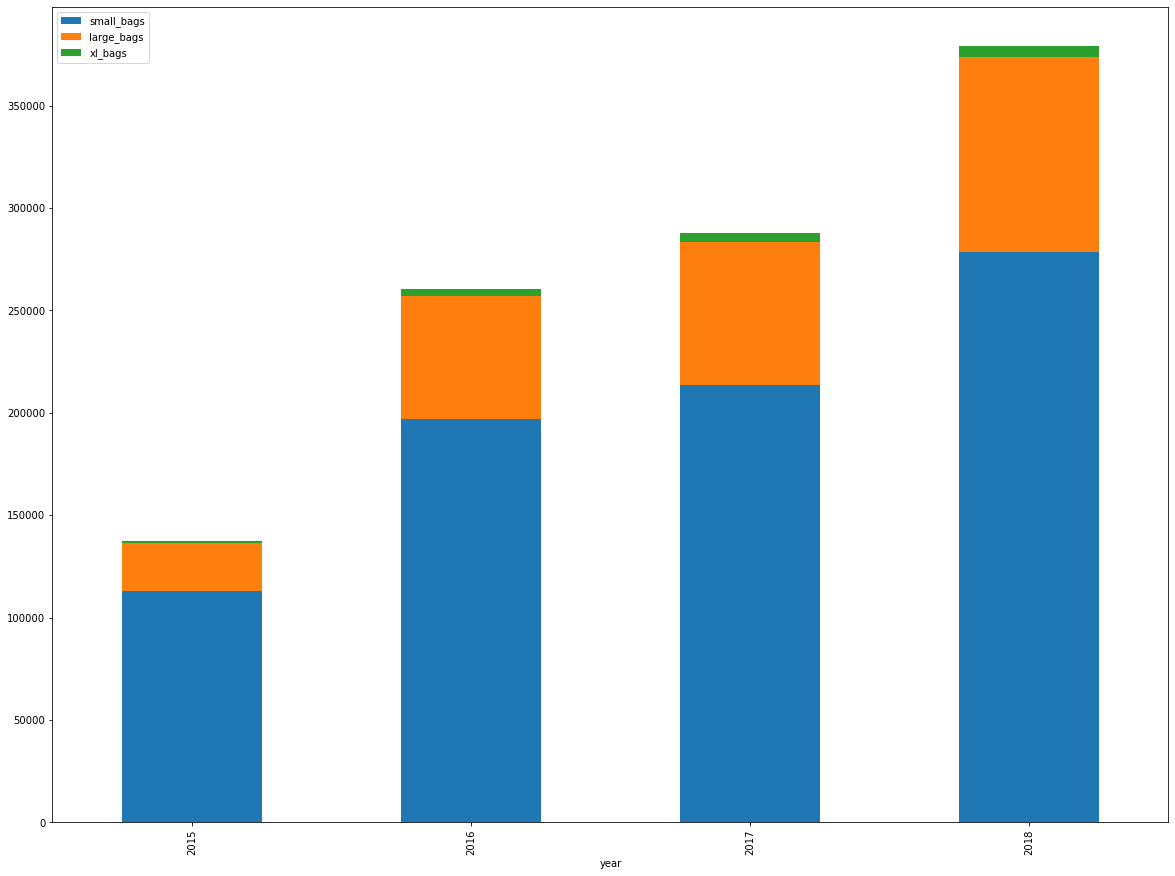

In [379]:
total_bags = data['Total Bags'].groupby(data['year']).mean()
small_bags = data['Small Bags'].groupby(data['year']).mean()
large_bags = data['Large Bags'].groupby(data['year']).mean()
xl_bags = data['XLarge Bags'].groupby(data['year']).mean()

trend = pd.DataFrame({'small_bags':small_bags,'large_bags':large_bags,
                     'xl_bags':xl_bags})
trend.plot(kind='bar',figsize=(20,15),stacked=True)
plt.show()

over the years it is seen that the overall sales of Avocado has been increased, also we can see from the above stacked bar chart that the proportion of Large bags and XL bags have also increased, so it can be infered that gradually people are increasing the purchase of avocado

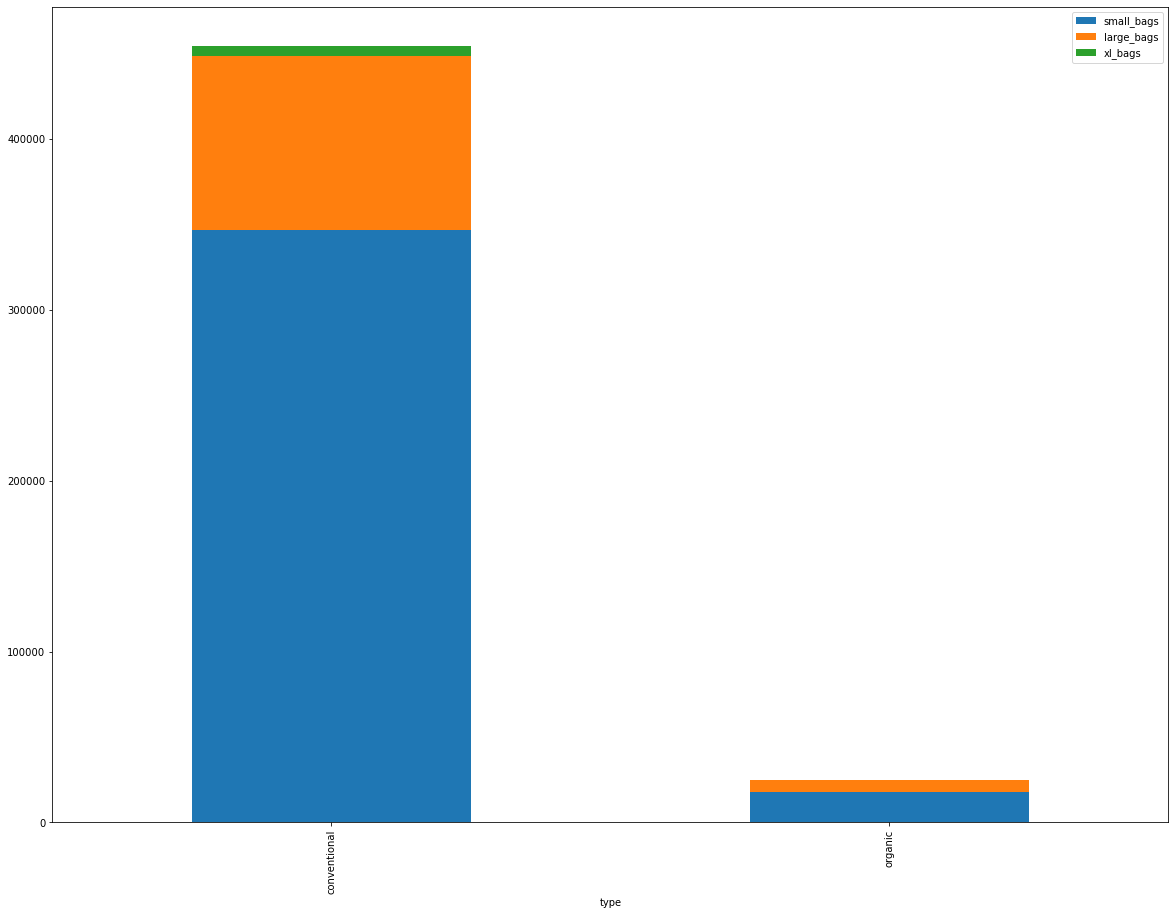

,small_bags,large_bags,xl_bags
type,,,
conventional,346721.795885,101457.698855,6210.635065
organic,17613.474543,7202.982659,1.197164


In [380]:
total_bags = data['Total Bags'].groupby(data['type']).mean()
small_bags = data['Small Bags'].groupby(data['type']).mean()
large_bags = data['Large Bags'].groupby(data['type']).mean()
xl_bags = data['XLarge Bags'].groupby(data['type']).mean()

trend = pd.DataFrame({'small_bags':small_bags,'large_bags':large_bags,
                     'xl_bags':xl_bags})
trend.plot(kind='bar',figsize=(20,15),stacked=True)
plt.show()

trend

as we can see from the above data that people tends to buy smaller quauntity for both type of avocado,

however for organic this difference is huge and we can easily conclude that people dnt prefer to buy organic in large quantities

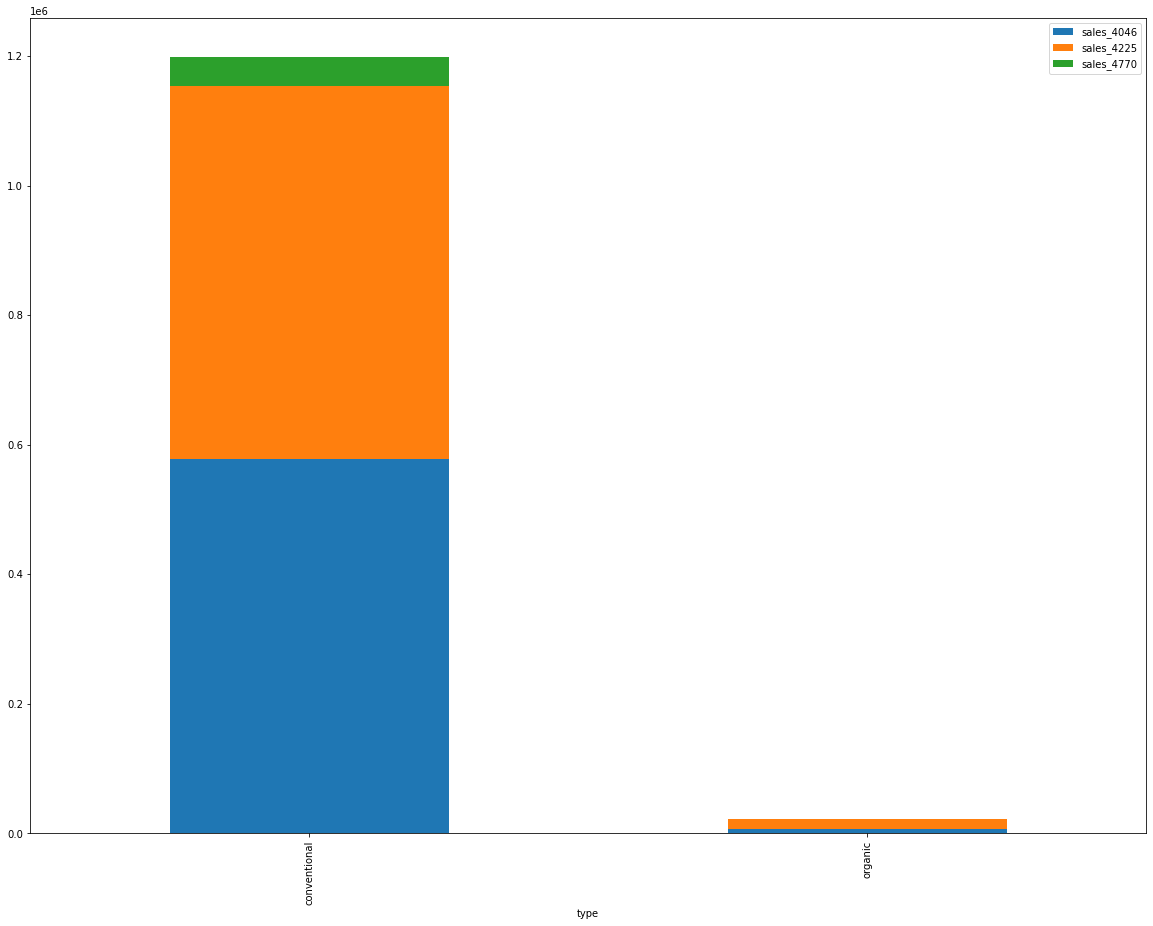

,sales_4046,sales_4225,sales_4770
type,,,
conventional,578611.649925,574805.318859,45405.796798
organic,7311.281600,15411.857724,266.254582


In [381]:
# comparing total sales of avocade with different SLU 
total_volume = data['Total Volume'].groupby(data['type']).mean()
sales_4046 = data['4046'].groupby(data['type']).mean()
sales_4225 = data['4225'].groupby(data['type']).mean()
sales_4770 = data['4770'].groupby(data['type']).mean()

trend = pd.DataFrame({'sales_4046':sales_4046,
                      'sales_4225':sales_4225,'sales_4770':sales_4770})
trend.plot(kind='bar',figsize=(20,15),stacked=True)
plt.show()

trend

for convential type of avocadoes we have seen that 4046 and 4225 are similar in terms of sales,

however, for organic, people prefers to buy 4225 over other two

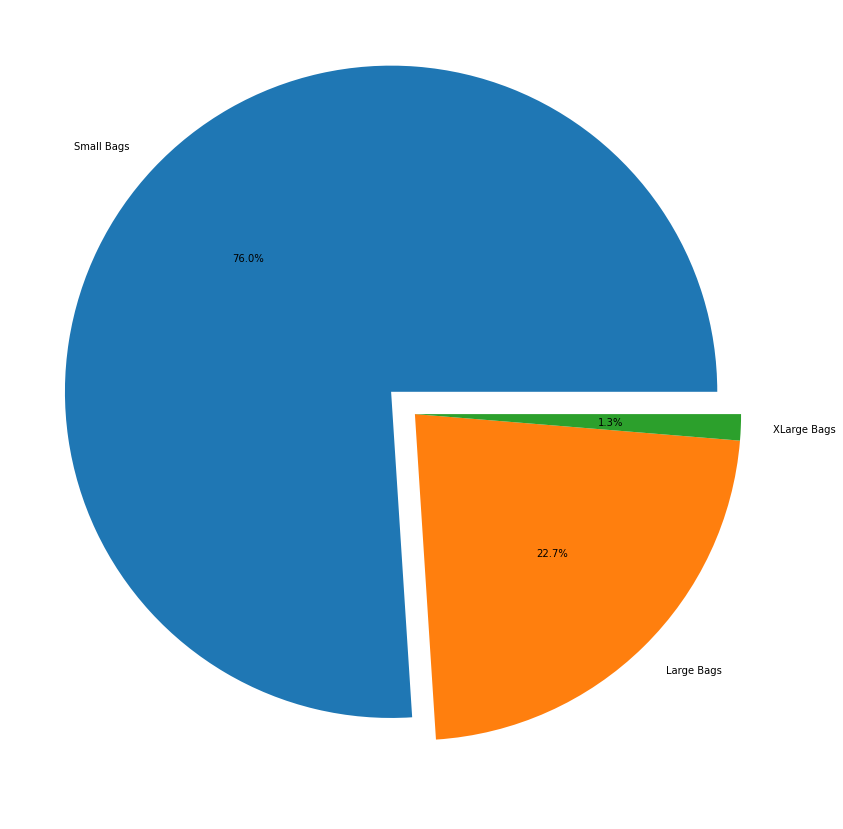

In [382]:
a = data['Small Bags'].sum() / data['Total Bags'].sum()*100
b = data['Large Bags'].sum() / data['Total Bags'].sum()*100
c = data['XLarge Bags'].sum() / data['Total Bags'].sum()*100

y = np.array([a,b,c])
mylabels = ["Small Bags", "Large Bags", "XLarge Bags"]

plt.figure(figsize=(20,15))
plt.pie(y, labels = mylabels,explode = [.1,0,0],autopct='%1.1f%%')
plt.show()

From the above pie chart it is seen that most around 76% of the total avocado sold are sold in small bags and 22.7% accounts of large bags, 
whereas only 1.3% of total sales made are of Xlarge bags

# Preprocessing

### Encoding the categorical data

In [383]:
# lets encode all the object data type
from sklearn.preprocessing import LabelEncoder

data['type'] = LabelEncoder().fit_transform(data['type'])
data['region'] = LabelEncoder().fit_transform(data['region'])
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,day,Day-Month,Month-Year,Quater
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27,12-27,2015-12,Q4-2015
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20,12-20,2015-12,Q4-2015
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13,12-13,2015-12,Q4-2015
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6,12-06,2015-12,Q4-2015
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29,11-29,2015-11,Q4-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4,02-04,2018-02,Q1-2018
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28,01-28,2018-01,Q1-2018
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21,01-21,2018-01,Q1-2018
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14,01-14,2018-01,Q1-2018


In [384]:
# now lets drop the date column and all other columsn that we have created for EDA

data = data.drop(columns=['Date','Month','day','Day-Month','Month-Year','Quater','year'])
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,53


<AxesSubplot:>

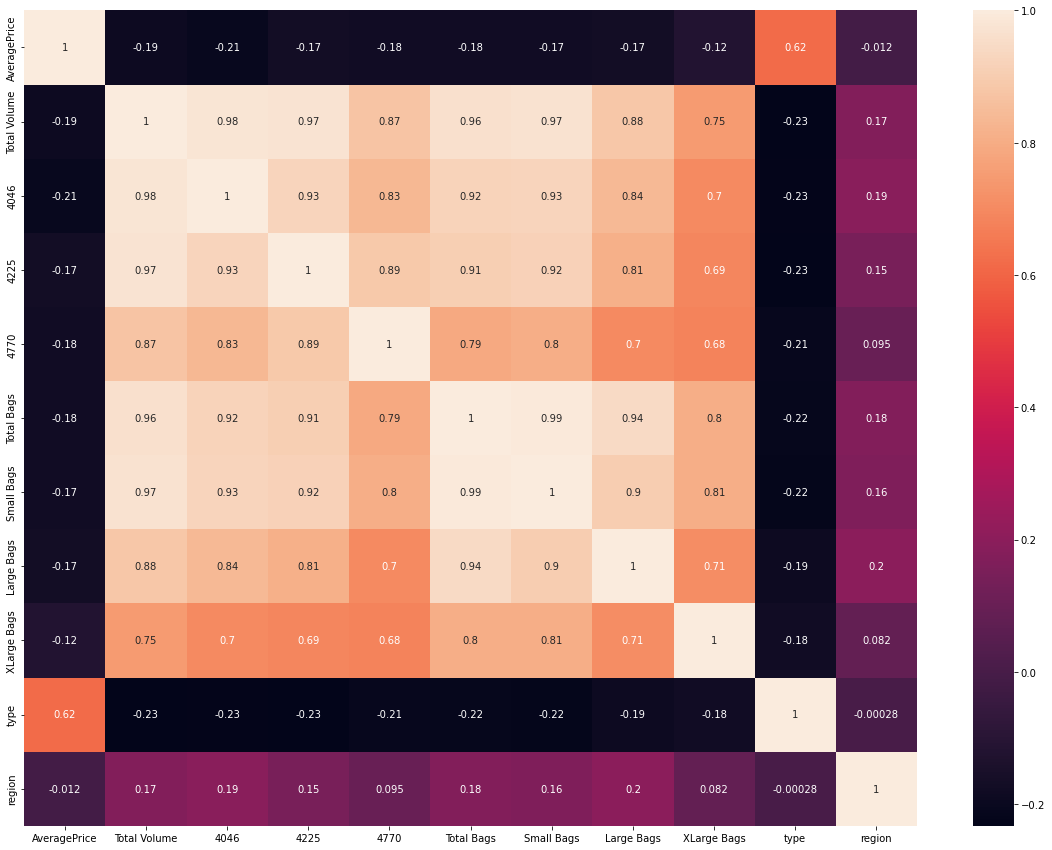

In [385]:
### checking for the multicolineaarity

plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)

as we can see that total volume and total bags are highly correlated with other features, that is because these two fields are the consolidated fields of other columns

so we will go ahead and delete these two columns to reduce the multicolinearity problem

<AxesSubplot:>

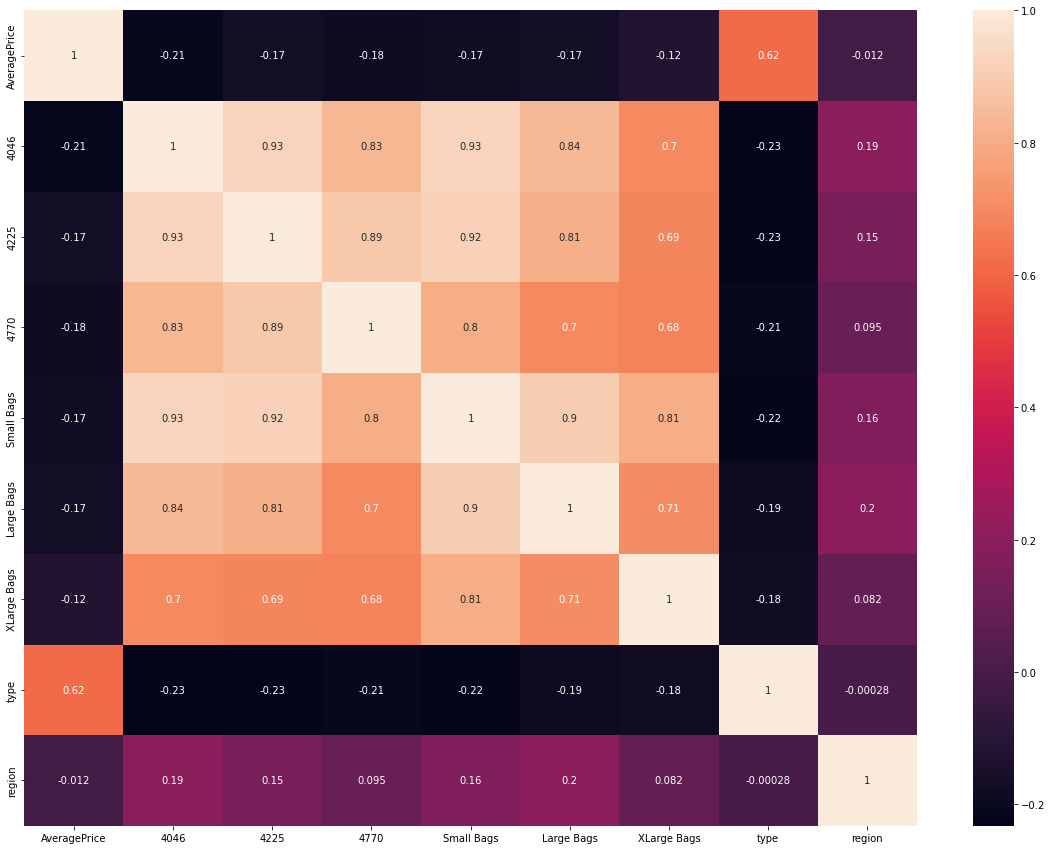

In [386]:
data = data.drop(columns=['Total Volume','Total Bags'])

plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)

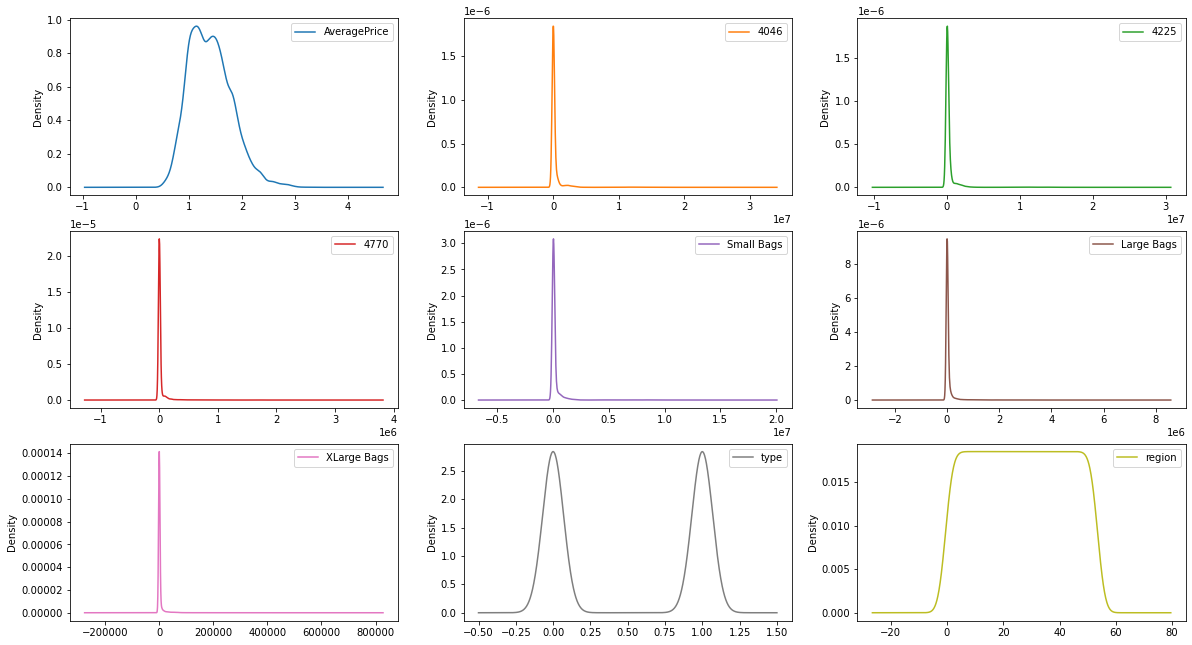

XLarge Bags     13.139751
4770            10.159396
Large Bags       9.796455
Small Bags       9.540660
4225             8.942466
4046             8.648220
AveragePrice     0.580303
type             0.000329
region           0.000030
dtype: float64

In [387]:
# now lets check the distribution of the data

data.plot(kind='density',subplots=True,sharex=False,layout=(4,3),figsize=(20,15))
plt.show()

data.skew().sort_values(ascending=False)

as from the above density plot and skewness table it is seen that almost all the features are highly skewed, so we will go ahead and remove the skewness but before that  we will remove the outlier data 

we will use zScrore technique to detct the outliers

<AxesSubplot:>

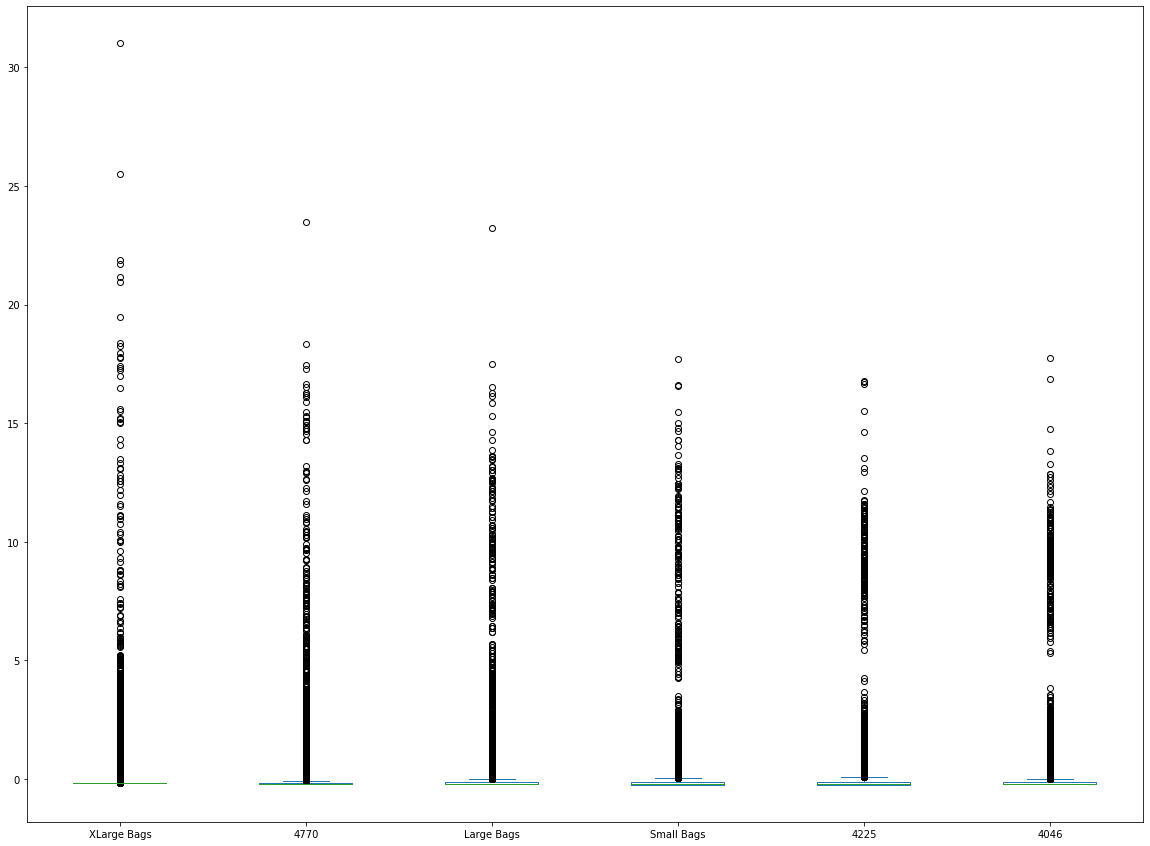

In [388]:
from scipy.stats import zscore


outlierlist = ['XLarge Bags','4770','Large Bags','Small Bags','4225','4046']
zscore(data[outlierlist]).plot(kind='box',figsize=(20,15))

as expected all the data have way to may outliers so we will remove it using IQR technique

In [389]:
#removing outliers using IQR
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

iqr = q3 -q1
q3

AveragePrice         1.66
4046            111020.20
4225            150206.86
4770              6243.42
Small Bags       83337.67
Large Bags       22029.25
XLarge Bags        132.50
type                 1.00
region              40.00
Name: 0.75, dtype: float64

In [390]:
## validating outliers from 4225
xl_high = (q3['4225'] + (1.5 * iqr['4225']))
xl_high

## removing outliers from 4225
xl_index = np.where(data['4225'] > xl_high)

data = data.drop(data.index[xl_index])

data.reset_index()

,index,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region
0,0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0
1,1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0
2,2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0
3,3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0
4,4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
15725,18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,53
15726,18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,53
15727,18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,53
15728,18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,53


In [392]:
## validating outliers from 4046
xl_high = (q3['4046'] + (1.5 * iqr['4046']))
xl_high

## removing outliers from 4046
xl_index = np.where(data['4046'] > xl_high)

data = data.drop(data.index[xl_index])

data.reset_index()

,index,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region
0,0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0
1,1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0
2,2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0
3,3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0
4,4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
14761,18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,53
14762,18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,53
14763,18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,53
14764,18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,53


In [394]:
## validating outliers from Small Bags
xl_high = (q3['Small Bags'] + (1.5 * iqr['Small Bags']))
xl_high

## removing outliers from Small Bags
xl_index = np.where(data['Small Bags'] > xl_high)

data = data.drop(data.index[xl_index])

data.reset_index()

,index,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region
0,0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0
1,1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0
2,2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0
3,3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0
4,4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
14446,18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,53
14447,18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,53
14448,18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,53
14449,18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,53


In [396]:
## validating outliers from Large Bags
xl_high = (q3['Large Bags'] + (1.5 * iqr['Large Bags']))
xl_high

## removing outliers from Large Bags
xl_index = np.where(data['Large Bags'] > xl_high)

data = data.drop(data.index[xl_index])

data.reset_index()

,index,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region
0,0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0
1,1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0
2,2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0
3,3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0
4,4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
13750,18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,53
13751,18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,53
13752,18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,53
13753,18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,53


In [398]:
## validating outliers from 4770
xl_high = (q3['4770'] + (1.5 * iqr['4770']))
xl_high

## removing outliers from 4770
xl_index = np.where(data['4770'] > xl_high)

data = data.drop(data.index[xl_index])

data.reset_index()

,index,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region
0,0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0
1,1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0
2,2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0
3,3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0
4,4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
12960,18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,53
12961,18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,53
12962,18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,53
12963,18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,53


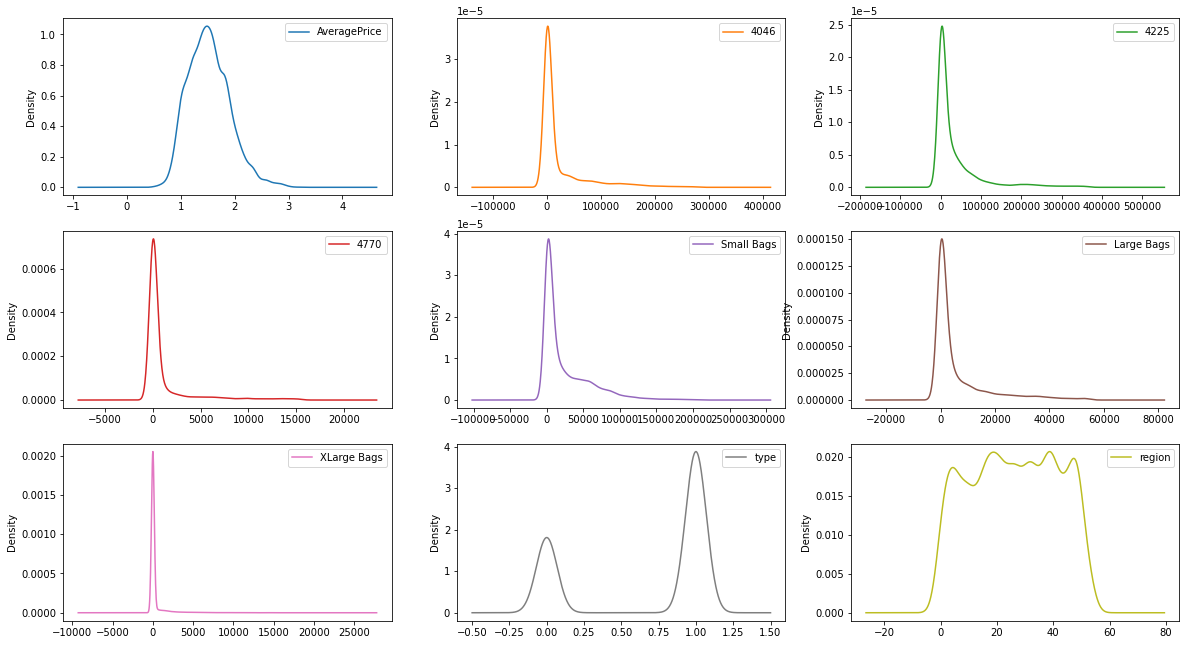

XLarge Bags     7.068109
4770            3.271110
4225            2.886774
4046            2.644298
Large Bags      2.376305
Small Bags      1.898837
AveragePrice    0.543711
region         -0.034139
type           -0.780897
dtype: float64

In [399]:
# after using IQR we have removed around 6000 datapoints, lets see how the data looks now
data.plot(kind='density',subplots=True,sharex=False,layout=(4,3),figsize=(20,15))
plt.show()

data.skew().sort_values(ascending=False)

data still looks skewed, now lets go ahead and use zscore technique to remove the outliers, and before that we will remove XLarge column, because it highly skewed column and its contribution to the overall dataset is very less

<AxesSubplot:>

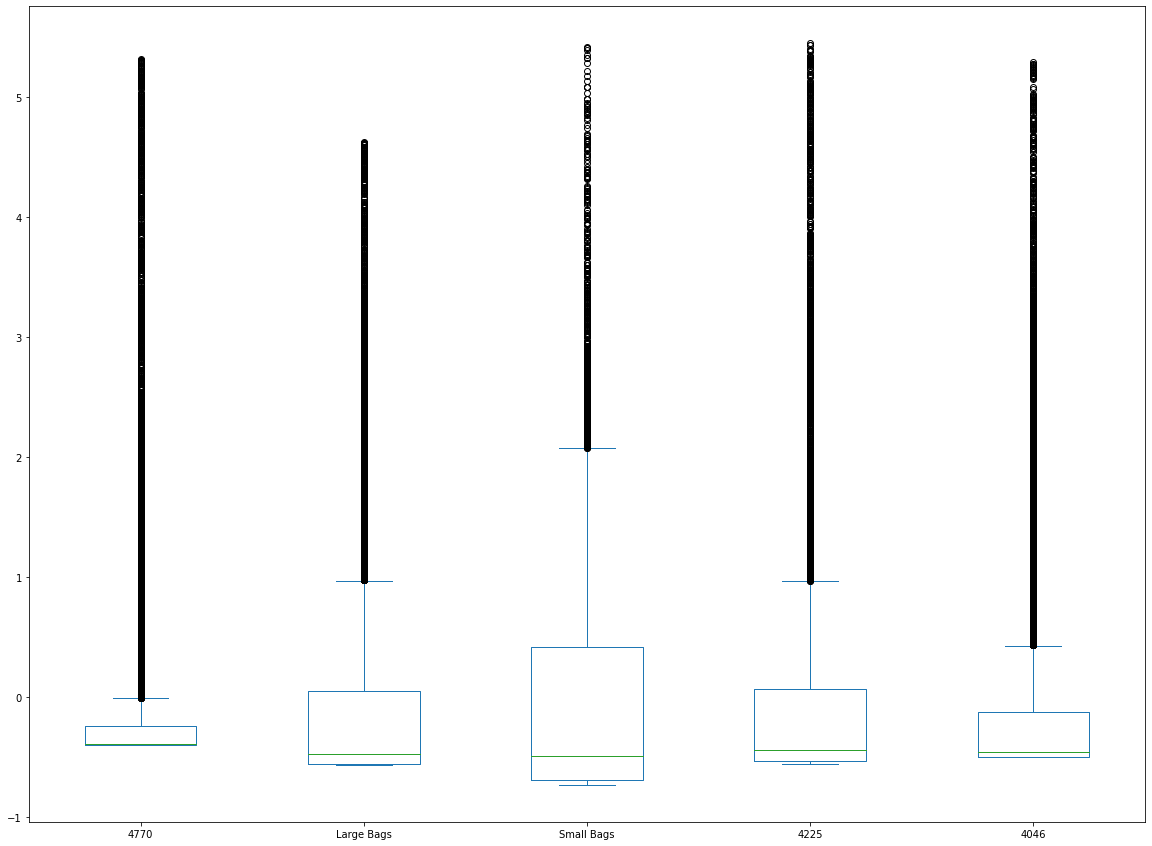

In [403]:
from scipy.stats import zscore


outlierlist = ['4770','Large Bags','Small Bags','4225','4046']
zscore(data[outlierlist]).plot(kind='box',figsize=(20,15))

<AxesSubplot:>

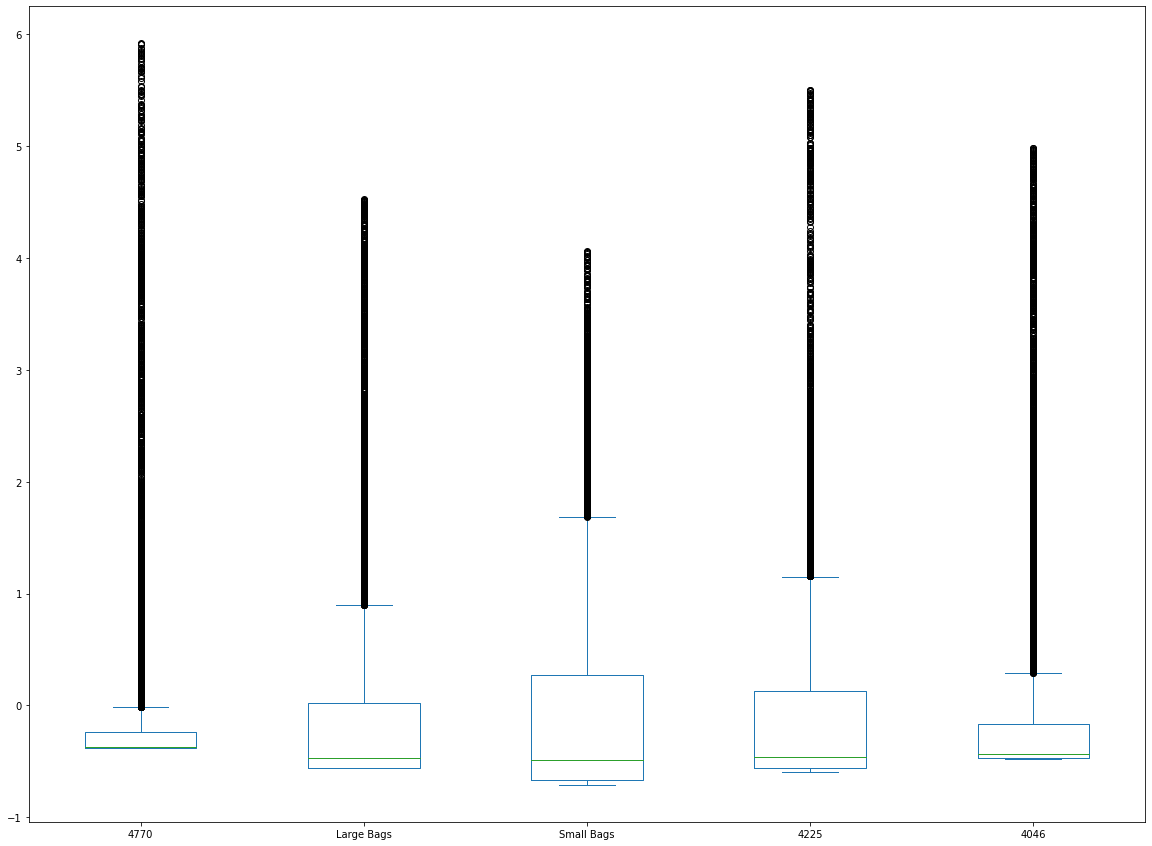

In [405]:
z_score= np.abs(zscore(data[outlierlist]))

data_new = data[(z_score<3).all(axis=1)]
zscore(data_new[outlierlist]).plot(kind='box',figsize=(20,15))

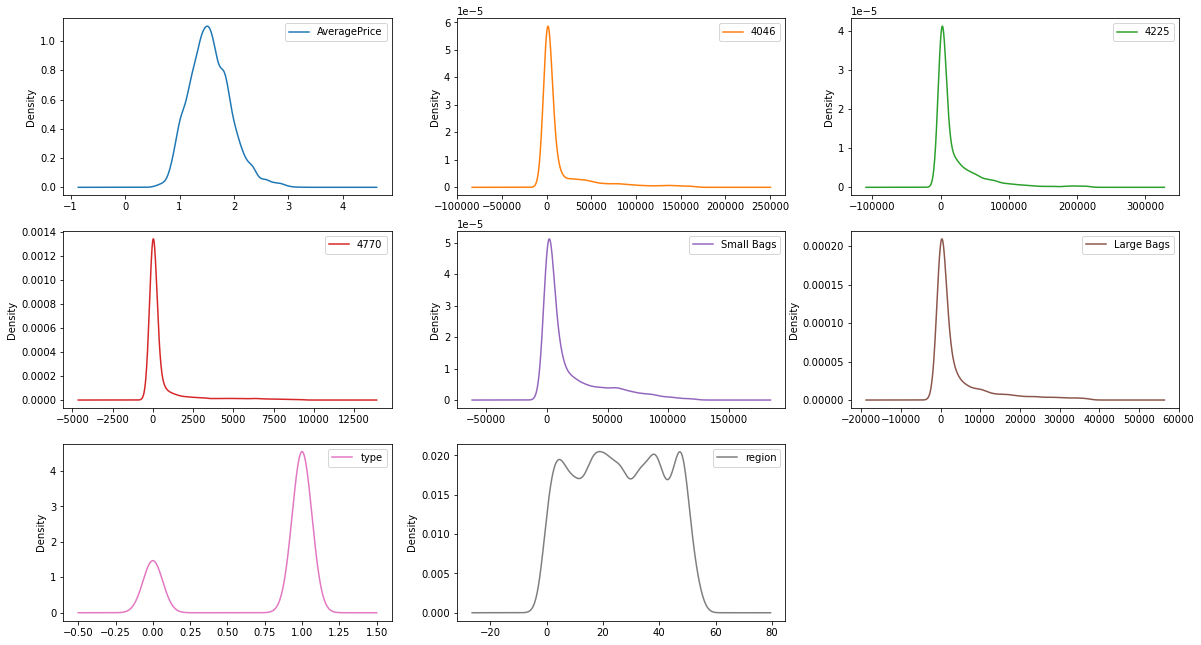

4770            3.502007
4046            2.792201
4225            2.760511
Large Bags      2.401119
Small Bags      1.730337
AveragePrice    0.497355
region          0.003804
type           -1.189909
dtype: float64

In [406]:
# after using IQR we have removed around 6000 datapoints, lets see how the data looks now
data_new.plot(kind='density',subplots=True,sharex=False,layout=(4,3),figsize=(20,15))
plt.show()

data_new.skew().sort_values(ascending=False)

after deleting observation we are not yet able to remove the sewness so we will apply transformation to reduce the skewness, first we will divide the data into feature and label

#  Classification - model

In [424]:
X = data_new.drop(columns='region')
y= data_new['region']

y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 11462, dtype: int32

Lets perform pwer transform to remove the skewness in the data

In [425]:
from sklearn.preprocessing import power_transform

x_trans = power_transform(X)
x_trans = pd.DataFrame(x_trans,columns=X.columns)

x_trans

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,type
0,-0.557486,-0.194838,1.234103,0.627284,0.185436,-0.428427,-1.758440
1,-0.499414,-0.350355,1.112628,0.681185,0.234234,-0.416369,-1.758440
2,-1.848939,-0.291470,1.683061,0.891709,0.149018,-0.401015,-1.758440
3,-1.333026,-0.162517,1.409649,0.740874,-0.033274,-0.329065,-1.758440
4,-0.705082,-0.230063,1.101716,0.752430,-0.006140,-0.217521,-1.758440
...,...,...,...,...,...,...,...
11457,0.261139,0.060178,-0.556245,-0.962628,0.419186,0.018162,0.568686
11458,0.462258,-0.143534,-0.216836,-0.962628,0.206298,-0.069734,0.568686
11459,0.845718,-0.143466,-0.361932,1.261094,0.230939,-0.633886,0.568686
11460,0.983528,-0.050909,-0.278375,1.260856,0.317009,-0.591873,0.568686


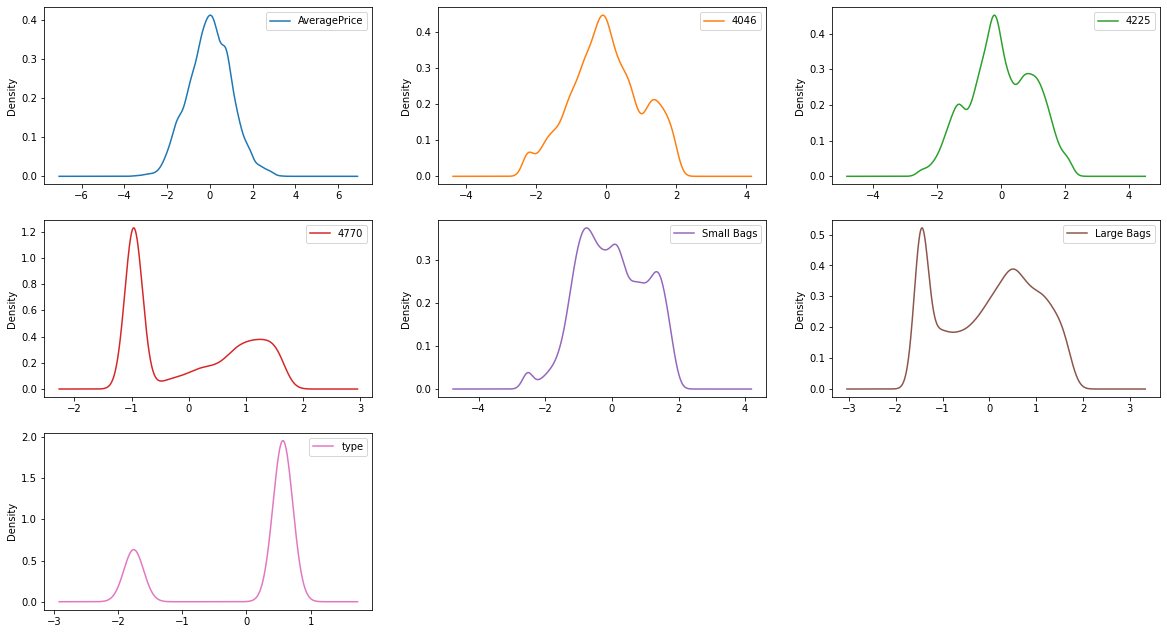

4770            0.286643
AveragePrice    0.000030
4046           -0.029846
4225           -0.061715
Small Bags     -0.064104
Large Bags     -0.138091
type           -1.189909
dtype: float64

In [426]:
x_trans.plot(kind='density',subplots=True,sharex=False,layout=(4,3),figsize=(20,15))
plt.show()

x_trans.skew().sort_values(ascending=False)

Finally it seems that the skewness has been removed

### Scaling the data

In [427]:
# scaled data using standard scalar
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(x_trans)
x_scaled

array([[-0.55748626, -0.19483755,  1.23410308, ...,  0.18543552,
        -0.42842731, -1.75843964],
       [-0.49941448, -0.35035511,  1.11262758, ...,  0.23423427,
        -0.41636867, -1.75843964],
       [-1.84893857, -0.29146965,  1.68306081, ...,  0.14901805,
        -0.4010146 , -1.75843964],
       ...,
       [ 0.84571779, -0.14346567, -0.36193233, ...,  0.23093909,
        -0.63388578,  0.568686  ],
       [ 0.98352829, -0.05090866, -0.27837512, ...,  0.31700918,
        -0.59187335,  0.568686  ],
       [ 0.23552985,  0.19448764, -0.37890934, ...,  0.3698119 ,
        -0.75187477,  0.568686  ]])

All the preprocessing of the data has been done, now we will train the model

I will be using follwoing model for prediction:
    
    Logisitics Regression
    DecsionTree
    Random Forest
    Knn

##### Identifying best random state for logisitics regression

In [429]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, auc
# best the best random state for Logistic regrssion model
ri = 0
acc = 0

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    lm = LogisticRegression()
    lm.fit(x_train,y_train)
    y_pred = lm.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = lm.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.5233318796336677 random state - 0
Accurancy Score -  0.5281290885303096 random state - 3
Accurancy Score -  0.5294374182293938 random state - 5
Accurancy Score -  0.5351068469254252 random state - 12
Accurancy Score -  0.546445704317488 random state - 13


##### Confusion matrix and clssification report - Logistics Regression

In [431]:
#the random state from logisitics regression is 61, so we will use to generate confusion matrix and classification report
# we got best result from random forest classifier we will use that result
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=13)
lm = LogisticRegression()
lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = lm.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 54.6445704317488 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.48      0.56      0.52        75
           1       0.30      0.37      0.33        35
           2       0.82      0.68      0.74        40
           3       0.46      0.31      0.37        68
           4       0.79      0.52      0.62        29
           5       0.61      0.58      0.59        66
           6       0.95      0.95      0.95        37
           7       0.63      0.53      0.57        51
           8       0.89      0.91      0.90        34
           9       0.53      0.71      0.61        35
          10       0.57      0.18      0.28        44
          11       0.56      0.88      0.69        25
          12       0.90      0.84      0.87        44
          13       0.20      0.19      0.19        27
          14       0.38      0.20      0.26        51
          15       0.92      0.92      0.92        24
 

##### Identifying best random state for Decision Tree

In [432]:
# best the best random state for Decision tree model
from sklearn.tree import DecisionTreeClassifier

ri = 0
acc = 0

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = dt.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.7588312254688181 random state - 0
Accurancy Score -  0.7692978630614915 random state - 5
Accurancy Score -  0.773222852158744 random state - 54


##### Confusion matrix and clssification report - Decision Tree

In [439]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=54)
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = dt.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 77.06061927605757 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.82      0.80      0.81        64
           1       0.72      0.72      0.72        36
           2       0.91      0.89      0.90        35
           3       0.77      0.82      0.79        65
           4       0.74      0.88      0.81        33
           5       0.77      0.72      0.74        67
           6       0.93      0.90      0.92        31
           7       0.87      0.82      0.85        50
           8       0.85      0.90      0.88        39
           9       0.81      0.78      0.79        37
          10       0.70      0.71      0.71        49
          11       0.92      0.81      0.86        43
          12       0.91      0.82      0.86        38
          13       0.50      0.59      0.54        27
          14       0.69      0.82      0.75        50
          15       0.79      0.73      0.76        15


##### Identifying best random state for Knn

In [441]:
# best the best random state for Logistic regrssion model
from sklearn.neighbors import KNeighborsClassifier
ri = 0
acc = 0

for i in range(0,500):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = knn.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.8386393371129525 random state - 0
Accurancy Score -  0.8390754470126471 random state - 200


##### Confusion matrix and clssification report - Knn

In [447]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=200)
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = knn.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 83.90754470126471 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.85      0.97      0.91        66
           1       0.67      0.71      0.69        34
           2       0.87      0.89      0.88        38
           3       0.89      0.80      0.84        69
           4       0.90      0.93      0.92        29
           5       0.87      0.79      0.83        76
           6       0.97      1.00      0.98        32
           7       0.91      0.87      0.89        55
           8       0.98      0.95      0.97        44
           9       0.67      0.86      0.75        28
          10       0.71      0.82      0.76        50
          11       0.91      0.94      0.92        32
          12       0.94      0.88      0.91        34
          13       0.63      0.84      0.72        31
          14       0.75      0.86      0.80        35
          15       1.00      1.00      1.00        26


##### Identifying best random state for Random Forest

In [448]:
# best the best random state for Logistic regrssion model
from sklearn.ensemble import RandomForestClassifier
ri = 0
acc = 0

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = rf.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.8713475795900567 random state - 0
Accurancy Score -  0.8853030963802878 random state - 3


##### Confusion matrix and clssification report - Random Forest

In [450]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=3)
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = rf.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 88.35586567815089 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.93      0.88      0.90        65
           1       0.77      0.77      0.77        43
           2       1.00      0.97      0.98        32
           3       0.93      0.89      0.91        61
           4       0.96      0.93      0.94        27
           5       0.82      0.85      0.84        54
           6       0.94      1.00      0.97        32
           7       0.91      0.91      0.91        43
           8       0.89      0.97      0.93        33
           9       0.91      0.94      0.93        33
          10       0.80      0.77      0.79        57
          11       0.95      1.00      0.97        35
          12       0.91      0.94      0.93        34
          13       0.89      0.80      0.85        41
          14       0.88      0.90      0.89        50
          15       0.96      1.00      0.98        25


as we are getting better result in random forest classifier, we will choose random forest as our final model

##### Hyper Parameter Tuning

In [452]:
from sklearn.model_selection import GridSearchCV
RandomForestClassifier()
param = {'criterion':['gini','entropy'],'min_samples_leaf': range(1,5),'min_samples_split': range(1,5),'max_depth':range(1,5),'random_state': range(1,5)}

grd = GridSearchCV(rf, param_grid=param)

grd.fit(x_train, y_train)

print(grd.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 2}


In [456]:
ri = 0
acc = 0
for i in range(1,100):
    rf = RandomForestClassifier(criterion='entropy', max_depth=87, min_samples_leaf=1,min_samples_split=2,random_state=i)
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    pacc = accuracy_score(y_pred,y_test)

    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.8822503270824248 random state - 1
Accurancy Score -  0.888355865678151 random state - 2
Accurancy Score -  0.8896641953772351 random state - 3
Accurancy Score -  0.8901003052769297 random state - 5
Accurancy Score -  0.8909725250763192 random state - 17
Accurancy Score -  0.8931530745747929 random state - 21


We have abeen able to improve the result by around 1% with new parameters and random state 21 so we will go ahead and use the new parameter

In [458]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=3)
rf = RandomForestClassifier(criterion='entropy', max_depth=87, min_samples_leaf=1,min_samples_split=2,random_state=21)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = rf.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 89.31530745747929 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.93      0.88      0.90        65
           1       0.83      0.81      0.82        43
           2       0.97      0.97      0.97        32
           3       0.98      0.89      0.93        61
           4       1.00      0.89      0.94        27
           5       0.76      0.87      0.81        54
           6       0.97      1.00      0.98        32
           7       0.91      0.91      0.91        43
           8       0.91      0.97      0.94        33
           9       0.89      0.97      0.93        33
          10       0.80      0.86      0.83        57
          11       0.97      1.00      0.99        35
          12       0.94      0.91      0.93        34
          13       0.85      0.83      0.84        41
          14       0.88      0.92      0.90        50
          15       0.96      1.00      0.98        25


#### Saving the model

In [459]:
import pickle

filename = 'final_model.pkl'
pickle.dump(rf, open('rf.pkl', 'wb'))

# Regression Model

In [462]:
X = data_new.drop(columns='AveragePrice')
y= data_new['AveragePrice']

X.head(15)

,4046,4225,4770,Small Bags,Large Bags,type,region
0,1036.74,54454.85,48.16,8603.62,93.25,0,0
1,674.28,44638.81,58.33,9408.07,97.49,0,0
2,794.70,109149.67,130.50,8042.21,103.14,0,0
3,1132.00,71976.41,72.58,5677.40,133.76,0,0
4,941.48,43838.39,75.78,5986.26,197.69,0,0
5,1184.27,48067.99,43.61,6556.47,127.44,0,0
6,1368.92,73672.72,93.26,8196.81,122.05,0,0
7,703.75,101815.36,80.00,6266.85,562.37,0,0
8,1022.15,87315.57,85.34,11104.53,283.83,0,0
9,842.40,64757.44,113.00,8061.47,564.45,0,0


In [463]:
from sklearn.preprocessing import power_transform

x_trans = power_transform(X)
x_trans = pd.DataFrame(x_trans,columns=X.columns)

x_trans

,4046,4225,4770,Small Bags,Large Bags,type,region
0,-0.194838,1.234103,0.627284,0.185436,-0.428427,-1.758440,-1.974788
1,-0.350355,1.112628,0.681185,0.234234,-0.416369,-1.758440,-1.974788
2,-0.291470,1.683061,0.891709,0.149018,-0.401015,-1.758440,-1.974788
3,-0.162517,1.409649,0.740874,-0.033274,-0.329065,-1.758440,-1.974788
4,-0.230063,1.101716,0.752430,-0.006140,-0.217521,-1.758440,-1.974788
...,...,...,...,...,...,...,...
11457,0.060178,-0.556245,-0.962628,0.419186,0.018162,0.568686,1.595303
11458,-0.143534,-0.216836,-0.962628,0.206298,-0.069734,0.568686,1.595303
11459,-0.143466,-0.361932,1.261094,0.230939,-0.633886,0.568686,1.595303
11460,-0.050909,-0.278375,1.260856,0.317009,-0.591873,0.568686,1.595303


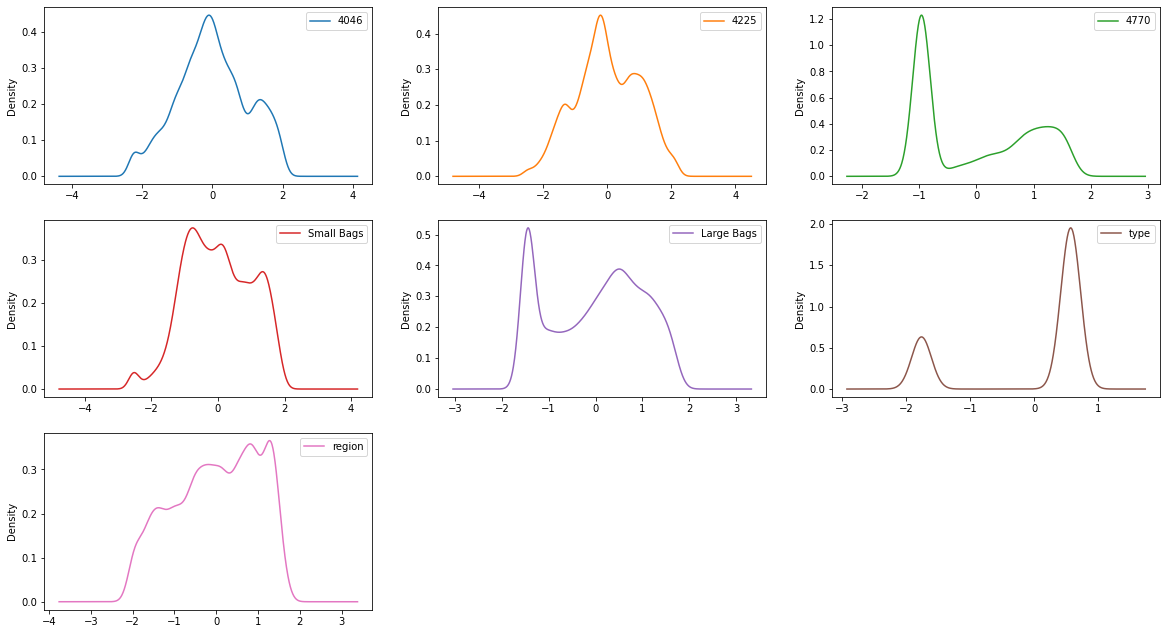

4770          0.286643
4046         -0.029846
4225         -0.061715
Small Bags   -0.064104
Large Bags   -0.138091
region       -0.272550
type         -1.189909
dtype: float64

In [464]:
x_trans.plot(kind='density',subplots=True,sharex=False,layout=(4,3),figsize=(20,15))
plt.show()

x_trans.skew().sort_values(ascending=False)

##### Scaling the data

In [465]:
# scaled data using standard scalar
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(x_trans)
x_scaled

array([[-0.19483755,  1.23410308,  0.62728442, ..., -0.42842731,
        -1.75843964, -1.97478768],
       [-0.35035511,  1.11262758,  0.68118531, ..., -0.41636867,
        -1.75843964, -1.97478768],
       [-0.29146965,  1.68306081,  0.89170945, ..., -0.4010146 ,
        -1.75843964, -1.97478768],
       ...,
       [-0.14346567, -0.36193233,  1.26109393, ..., -0.63388578,
         0.568686  ,  1.59530272],
       [-0.05090866, -0.27837512,  1.26085557, ..., -0.59187335,
         0.568686  ,  1.59530272],
       [ 0.19448764, -0.37890934,  1.01948604, ..., -0.75187477,
         0.568686  ,  1.59530272]])

#### Training the model

We will use 4 regression model to predict the data

    - linear regression
    - xgboost
    - decisiontree regressor
    - Random forest regressor

In [466]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
# best the best random state for linear regrssion model
ri = 0
mae = 10
score = 0

for i in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    lm = LinearRegression()
    lm.fit(x_train,y_train)
    y_pred = lm.predict(x_test)
    pri = i
    pmae = mean_absolute_error(y_test,y_pred)
    pscore = lm.score(x_test,y_test)
    
    if mae > pmae:
        mae = pmae
        ri = pri
        score = pscore
print('mean absolute error - ',mae,'\n','random state -',ri,'\n','Score --',pscore)

mean absolute error -  0.22757505031880382 
 random state - 7 
 Score -- 0.33636503983179


In [467]:
#finding the best random state for decision tree regressor
from sklearn.tree import DecisionTreeRegressor

ri = 0
mae = 10
score = 0

for i in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    dt = DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_test)
    pri = i
    pmae = mean_absolute_error(y_test,y_pred)
    pscore = dt.score(x_test,y_test)
    
    if mae > pmae:
        mae = pmae
        ri = pri
        score = pscore
print('mean absolute error - ',mae,'\n','random state -',ri,'\n','Score --',pscore)

mean absolute error -  0.17000436109899697 
 random state - 100 
 Score -- 0.5200633193628821


In [481]:
#finding the best random state for random forest regressor regressor
from sklearn.ensemble import RandomForestRegressor

ri = 0
mae = 10
score = 0

for i in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    rf_reg = RandomForestRegressor()
    rf_reg.fit(x_train,y_train)
    y_pred = rf_reg.predict(x_test)
    pri = i
    pmae = mean_absolute_error(y_test,y_pred)
    pscore = rf_reg.score(x_test,y_test)
    
    if mae > pmae:
        mae = pmae
        ri = pri
        score = pscore
print('mean absolute error - ',mae,'\n','random state -',ri,'\n','Score --',pscore)

mean absolute error -  0.1289638901003053 
 random state - 71 
 Score -- 0.7447435066751811


In [471]:
import xgboost as xgb
xgb1 = xgb.XGBRegressor()

ri = 0
mae = 10
score = 0

for i in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    xgb1.fit(x_train,y_train)
    y_pred = xgb1.predict(x_test)
    pri = i
    pmae = mean_absolute_error(y_test,y_pred)
    pscore = xgb1.score(x_test,y_test)
    
    if mae > pmae:
        mae = pmae
        ri = pri
        score = pscore
print('mean absolute error - ',mae,'\n','random state -',ri,'\n','Score --',pscore)

mean absolute error -  0.13907391311713715 
 random state - 149 
 Score -- 0.7224628819643921


we got best result from Random forest regressor with 74 % accuracy, so we will use random forest regressor as our final model

In [505]:
rf_reg = RandomForestRegressor()
x_train, x_test, y_train, y_test = train_test_split(x_trans,y,train_size=.8,random_state=149)
rf_reg.fit(x_train,y_train)
y_pred = rf_reg.predict(x_test)
rf_reg.score(x_test,y_test)

0.766469053381061

### Model Evaulation

<AxesSubplot:xlabel='AveragePrice'>

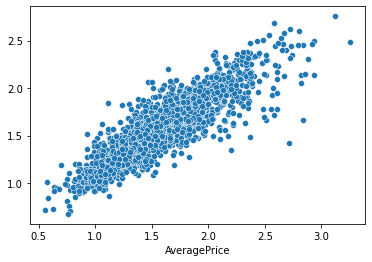

In [483]:
# comparing the predicted result with actual result using scatterplot
sns.scatterplot(x=y_test,y=y_pred)

In [484]:

from sklearn.metrics import r2_score

print('mean absolute error --',mean_absolute_error(y_test,y_pred))
print('mean Squared error --',mean_squared_error(y_test,y_pred))
print('R2 Score --',r2_score(y_test,y_pred))

mean absolute error -- 0.13329040558220667
mean Squared error -- 0.034375645028347133
R2 Score -- 0.769669713320343


# all the metrics are close to zero it means that model is quite accurate

#### Hyper Parameter tuning

In [492]:

param = {'max_depth': range(1,3),'criterion':['mse','mae'],'min_samples_leaf': [2,8,7],'max_leaf_nodes': [7,9]}

grd = GridSearchCV(rf_reg, param_grid=param)

grd.fit(x_train, y_train)

print(grd.best_params_)

{'criterion': 'mse', 'max_depth': 2, 'max_leaf_nodes': 7, 'min_samples_leaf': 7}


In [ ]:
rf_reg = RandomForestRegressor(criterion='mae', min_samples_leaf=2,max_leaf_nodes=116,max_depth=79)
x_train, x_test, y_train, y_test = train_test_split(x_trans,y,train_size=.8,random_state=149)
rf_reg.fit(x_train,y_train)
y_pred = rf_reg.predict(x_test)
rf_reg.score(x_test,y_test)

we are not getting better result from hyper parameter tuning so we will use model without hyper parameter tuning and save it

##### Saving the best Model - Random Forest

In [506]:
import pickle

filename = 'final_model_regression.pkl'
pickle.dump(rf, open('rf_reg.pkl', 'wb'))